In [1]:
%matplotlib inline
#%matplotlib nbagg
# %matplotlib notebook
import numpy as np
import pandas as pd
import sys
from io import StringIO
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.animation as animation
import time
from IPython import display
from sklearn.linear_model import SGDClassifier

In [54]:
## Reading from toy dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target
m = X.shape[0]
df = pd.DataFrame(X)
df.head()

sklearn.utils.Bunch

In [3]:
#Choosing best features
X_new = boston.data[:,7:8]
X_new.shape
y = np.reshape(y,(506,1))

In [4]:
sgd = SGDClassifier(verbose = 1)
sgd.fit(X_new,y)

/home/romil/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/romil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: (array([ 5. ,  5.6,  6.3,  7. ,  7.2,  7.4,  7.5,  8.1,  8.3,  8.4,  8.5,
        8.7,  8.8,  9.5,  9.6,  9.7, 10.2, 10.4, 10.5, 10.8, 10.9, 11. ,
       11.3, 11.5, 11.7, 11.8, 11.9, 12. , 12.1, 12.3, 12.5, 12.6, 12.7,
       12.8, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.8, 13.9, 14. ,
       14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.6, 15.7, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6,
       16.7, 16.8, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8,
       17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9,
       19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. ,
       20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1,
       21.2, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 25. , 25.1, 25.2, 25.3, 26.2, 26.4, 26.5, 26.6,
       26.7, 27. , 27.1, 27.5, 27.9, 28. , 28.1, 28.2, 28.4, 28.5, 28.6,
       28.7, 29. , 29.1, 29.4, 29.6, 29.8, 29.9, 30.1, 30.3, 30.5, 30.7,
       30.8, 31. , 31.1, 31.2, 31.5, 31.6, 31.7, 32. , 32.2, 32.4, 32.5,
       32.7, 32.9, 33. , 33.1, 33.2, 33.3, 33.4, 33.8, 34.6, 34.7, 34.9,
       35.1, 35.2, 35.4, 36. , 36.1, 36.2, 36.4, 36.5, 37. , 37.2, 37.3,
       37.6, 37.9, 38.7, 39.8, 41.3, 41.7, 42.3, 42.8, 43.1, 43.5, 43.8,
       44. , 44.8, 45.4, 46. , 46.7, 48.3, 48.5, 48.8, 50. ]),)

In [5]:
sgd.get_params

<bound method BaseEstimator.get_params of SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)>

## Preprocessing of data 

In [6]:
X_new = preprocessing.scale(X_new)
X_b = np.concatenate((np.ones((m,1)),X_new),axis = 1)

In [7]:
y.shape

(506, 1)

In [8]:
X_b.shape

(506, 2)

In [9]:
def  gradient_descent (X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,1+1))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [10]:
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [11]:
def plot_graph(slope,c):
   
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.scatter(X_new, y)

    x_min, x_max = ax.get_xlim()
    y_min, y_max = c, c + slope*(x_max-x_min)
    ax.plot([x_min, x_max], [y_min, y_max], color = 'r')
    ax.set_xlim([x_min, x_max])

In [12]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
print('Theta0:          {},\nTheta1:          {}'.format(theta[0][0],theta[1][0]))

print('Final cost/MSE:  {}'.format(cost_history[-1]))

Theta0:          22.531819308841552,
Theta1:          2.296353827124423
Final cost/MSE:  10132156.481884884


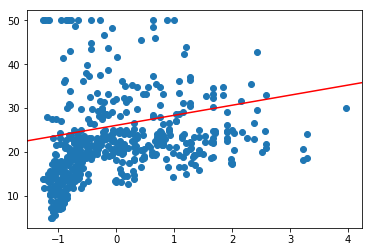

In [13]:
intercept,coeff = theta[0][0],theta[1][0]
plot_graph(coeff,intercept)

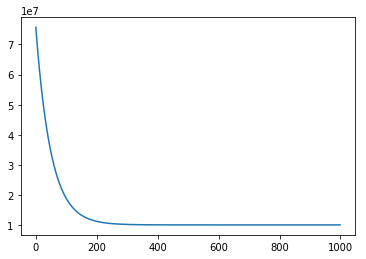

In [14]:
plt.plot(cost_history)

In [15]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = SGDClassifier(verbose=1)
clf.fit(X_b,y)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.savefig("warmstart_plots/pure_SGD:"+str(kwargs)+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.close()

/home/romil/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/romil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: (array([ 5. ,  5.6,  6.3,  7. ,  7.2,  7.4,  7.5,  8.1,  8.3,  8.4,  8.5,
        8.7,  8.8,  9.5,  9.6,  9.7, 10.2, 10.4, 10.5, 10.8, 10.9, 11. ,
       11.3, 11.5, 11.7, 11.8, 11.9, 12. , 12.1, 12.3, 12.5, 12.6, 12.7,
       12.8, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.8, 13.9, 14. ,
       14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.6, 15.7, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6,
       16.7, 16.8, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8,
       17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9,
       19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. ,
       20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1,
       21.2, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 25. , 25.1, 25.2, 25.3, 26.2, 26.4, 26.5, 26.6,
       26.7, 27. , 27.1, 27.5, 27.9, 28. , 28.1, 28.2, 28.4, 28.5, 28.6,
       28.7, 29. , 29.1, 29.4, 29.6, 29.8, 29.9, 30.1, 30.3, 30.5, 30.7,
       30.8, 31. , 31.1, 31.2, 31.5, 31.6, 31.7, 32. , 32.2, 32.4, 32.5,
       32.7, 32.9, 33. , 33.1, 33.2, 33.3, 33.4, 33.8, 34.6, 34.7, 34.9,
       35.1, 35.2, 35.4, 36. , 36.1, 36.2, 36.4, 36.5, 37. , 37.2, 37.3,
       37.6, 37.9, 38.7, 39.8, 41.3, 41.7, 42.3, 42.8, 43.1, 43.5, 43.8,
       44. , 44.8, 45.4, 46. , 46.7, 48.3, 48.5, 48.8, 50. ]),)

In [16]:
from matplotlib import pyplot
from scipy.stats import norm

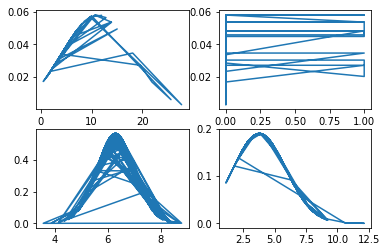

In [19]:
plt.subplot(2,2,1)
X1 = X[:,2:3]
pdf = norm.pdf(X1, X1.mean(),X1.std())
pyplot.plot(X1, pdf)
plt.subplot(2,2,2)
X2 = X[:,3:4]
pdf = norm.pdf(X1, X1.mean(),X1.std())
pyplot.plot(X2, pdf)
plt.subplot(2,2,3)
X3 = X[:,5:6]
pdf = norm.pdf(X3, X3.mean(),X3.std())
pyplot.plot(X3, pdf)
plt.subplot(2,2,4)
X4 = X[:,7:8]
pdf = norm.pdf(X4, X4.mean(),X4.std())
pyplot.plot(X4, pdf)
plt.show()


In [ ]:
pdf = norm.pdf(X, X.mean(), X.std())
# plot
pyplot.plot(X, pdf)
pyplot.show()

In [21]:
X,y

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]), array([[24. ],
        [21.6],
        [34.7],
        [33.4],
        [36.2],
        [28.7],
        [22.9],
        [27.1],
        [16.5],
        [18.9],
        [15. ],
        [18.9],
        [21.7],
        [20.4],
        [18.2],
        [19.9],
        [23.1],
        [17.5],
        [20.2],
        [18.2],
        [13.6],
        [19.6],
        [15.2],
        [14.5],
        [15.6],
        [1

In [35]:
x = X[:,7:8]
x

array([[ 4.09  ],
       [ 4.9671],
       [ 4.9671],
       [ 6.0622],
       [ 6.0622],
       [ 6.0622],
       [ 5.5605],
       [ 5.9505],
       [ 6.0821],
       [ 6.5921],
       [ 6.3467],
       [ 6.2267],
       [ 5.4509],
       [ 4.7075],
       [ 4.4619],
       [ 4.4986],
       [ 4.4986],
       [ 4.2579],
       [ 3.7965],
       [ 3.7965],
       [ 3.7979],
       [ 4.0123],
       [ 3.9769],
       [ 4.0952],
       [ 4.3996],
       [ 4.4546],
       [ 4.682 ],
       [ 4.4534],
       [ 4.4547],
       [ 4.239 ],
       [ 4.233 ],
       [ 4.175 ],
       [ 3.99  ],
       [ 3.7872],
       [ 3.7598],
       [ 3.3603],
       [ 3.3779],
       [ 3.9342],
       [ 3.8473],
       [ 5.4011],
       [ 5.4011],
       [ 5.7209],
       [ 5.7209],
       [ 5.7209],
       [ 5.7209],
       [ 5.1004],
       [ 5.1004],
       [ 5.6894],
       [ 5.87  ],
       [ 6.0877],
       [ 6.8147],
       [ 6.8147],
       [ 6.8147],
       [ 6.8147],
       [ 7.3197],
       [ 8

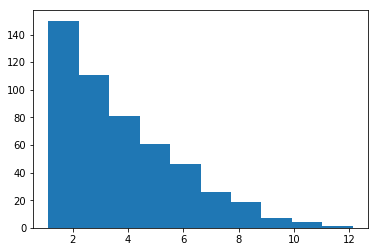

In [52]:
y = plt.hist(x)

In [51]:
pdf = 

In [45]:
cdf = np.cumsum(y[0])

In [46]:
cdf

array([150., 261., 342., 403., 449., 475., 494., 501., 505., 506.])

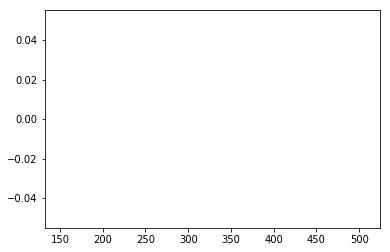

In [49]:
y = plt.hist(x,bins=cdf)